# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [124]:
!pip install requests
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install python-dotenv


In [125]:
#📥 Import et configuration
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
import os 
from dotenv import load_dotenv



🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [126]:
### 💡 Première requête guidée

def get_weather_data(city, api_key):

    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    BASE_URL=  "https://api.openweathermap.org/data/2.5/"
    # URL : current weather data
    url = f"{BASE_URL}/weather"

            
    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    # Votre code ici pour l'appel API
    
    # response = requests.get(url, params=params)
    # Gérez les erreurs HTTP !

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Lève une exception si le code n'est pas 200
        
        data = response.json()
        # result.append(data)
        print("Données météo récupérées avec succès :")
        return data
    except requests.exceptions.HTTPError as http_err:
            print(f"Erreur HTTP : {http_err} - Code : {response.status_code}")
            if response.status_code == 401:
                print(" Clé API invalide ou absente.")
            elif response.status_code == 404:
                print("Ville non trouvée.")
            elif response.status_code == 429:
                print("Trop de requêtes (limite atteinte).")
            else:
                print("Autre erreur HTTP.")

    except requests.exceptions.RequestException as err:
            print(f"Erreur de connexion ou de requête : {err}")
        


In [127]:
# Configuration API
load_dotenv() # Charger le fichier .env
api_key = os.getenv("API_KEY")# Récupérer la clé API depuis les variables d’environnement

BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Amsterdam", "Vienna"]

result= []
for city in CITIES:    
    data = get_weather_data(city,api_key)
    result.append(data)
    print(json.dumps(result, indent=2))
    



Données météo récupérées avec succès :
[
  {
    "coord": {
      "lon": 2.3488,
      "lat": 48.8534
    },
    "weather": [
      {
        "id": 804,
        "main": "Clouds",
        "description": "couvert",
        "icon": "04d"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 20.78,
      "feels_like": 20.9,
      "temp_min": 19.88,
      "temp_max": 21.77,
      "pressure": 1018,
      "humidity": 76,
      "sea_level": 1018,
      "grnd_level": 1009
    },
    "visibility": 10000,
    "wind": {
      "speed": 4.12,
      "deg": 270
    },
    "clouds": {
      "all": 100
    },
    "dt": 1753867608,
    "sys": {
      "type": 1,
      "id": 6550,
      "country": "FR",
      "sunrise": 1753849276,
      "sunset": 1753903957
    },
    "timezone": 7200,
    "id": 2988507,
    "name": "Paris",
    "cod": 200
  }
]
Données météo récupérées avec succès :
[
  {
    "coord": {
      "lon": 2.3488,
      "lat": 48.8534
    },
    "weather": [
      {
        "id": 8

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
- Comment gérer une ville introuvable ?

---

On peut utiliser raise_for_status() qui lève une exception si le serveur retourne une erreur HTTP (code 4xx ou 5xx).

Bloc except :
Gère les erreurs 401 (clé API), 404 (ville inconnue), 429 (trop de requêtes), etc.
Attrape aussi les erreurs de connexion (ConnectionError, Timeout, etc.).

In [128]:
# try:
#     response = requests.get(url, params=params)
#     response.raise_for_status()  # Lève une exception si le code n'est pas 200
#     data = response.json()
#     print("Données météo récupérées avec succès :")
#     print(data)

# except requests.exceptions.HTTPError as http_err:
#     print(f"Erreur HTTP : {http_err} - Code : {response.status_code}")
#     if response.status_code == 401:
#         print(" Clé API invalide ou absente.")
#     elif response.status_code == 404:
#         print("Ville non trouvée.")
#     elif response.status_code == 429:
#         print("Trop de requêtes (limite atteinte).")
#     else:
#         print("Autre erreur HTTP.")

# except requests.exceptions.RequestException as err:
#     print(f"Erreur de connexion ou de requête : {err}")

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [129]:
# Configuration Visual Crossing
load_dotenv()
VC_API_KEY = os.getenv("VC_API_KEY")
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

OW_BASE_URL= "https://history.openweathermap.org/data/2.5/history/city"
OW_API_KEY = os.getenv("OW_API_KEY")

start_date = "2025-07-25"
end_date = "2025-07-29"

def get_historical_weather(city, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"

    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed,pressure'
    }

    # Votre implémentation ici
    # Pensez à la gestion d'erreurs !

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()

        # Extraction des données journalières
        days_data = data.get("days", [])
        if not days_data:
            print(f"Aucune donnée disponible pour {city}.")
            return None

        # Conversion en DataFrame
        df = pd.DataFrame(days_data)
        df = df[["datetime", "temp", "humidity", "precip", "windspeed"]]
        df["city"] = city  # Ajoute la ville à chaque ligne
        return df

    except requests.exceptions.HTTPError as http_err:
        print(f"Erreur HTTP : {http_err} - Code : {response.status_code}")
        if response.status_code == 401:
            print("Clé API invalide ou absente.")
        elif response.status_code == 404:
            print("Ville non trouvée.")
        elif response.status_code == 429:
            print("Trop de requêtes (limite atteinte).")
    except requests.exceptions.RequestException as err:
        print(f"Erreur de connexion ou de requête : {err}")

    return None



In [130]:
cities = ["Paris", "Berlin", "Madrid", "Amsterdam", "Vienna"]
all_data = []


for city in cities:
    df_city = get_historical_weather(city, start_date, end_date, VC_API_KEY)
    if df_city is not None:
        # S'assurer que la colonne 'city' est bien là
        if "city" not in df_city.columns:
            df_city.insert(1, "city", city)  # Insère à la position 1 (après datetime)
        else:
            # Si la colonne existe mais à une mauvaise place, on la repositionne
            col = df_city.pop("city")  # Retire la colonne
            df_city.insert(1, "city", col)  # La remet à la position 1
        all_data.append(df_city)

# Fusionner tous les DataFrames
if all_data:
    df_all = pd.concat(all_data, ignore_index=True)
    print(df_all)
else:
    print("Aucune donnée récupérée.")



      datetime       city  temp  humidity  precip  windspeed
0   2025-07-25      Paris  69.3      72.8   0.000        7.6
1   2025-07-26      Paris  70.5      67.8   0.000       10.1
2   2025-07-27      Paris  65.9      78.8   0.221       14.4
3   2025-07-28      Paris  66.0      65.9   0.000        8.6
4   2025-07-29      Paris  62.7      78.8   0.052       10.3
5   2025-07-25     Berlin  67.9      85.0   0.166       12.1
6   2025-07-26     Berlin  66.8      78.5   0.099        9.7
7   2025-07-27     Berlin  68.6      69.7   0.000       11.4
8   2025-07-28     Berlin  68.1      72.2   0.112       18.3
9   2025-07-29     Berlin  64.5      69.2   0.000       15.0
10  2025-07-25     Madrid  72.1      38.2   0.000       10.7
11  2025-07-26     Madrid  76.6      35.9   0.000        9.2
12  2025-07-27     Madrid  81.2      30.7   0.000       12.8
13  2025-07-28     Madrid  79.4      33.6   0.000       11.3
14  2025-07-29     Madrid  74.1      38.6   0.000       12.2
15  2025-07-25  Amsterda

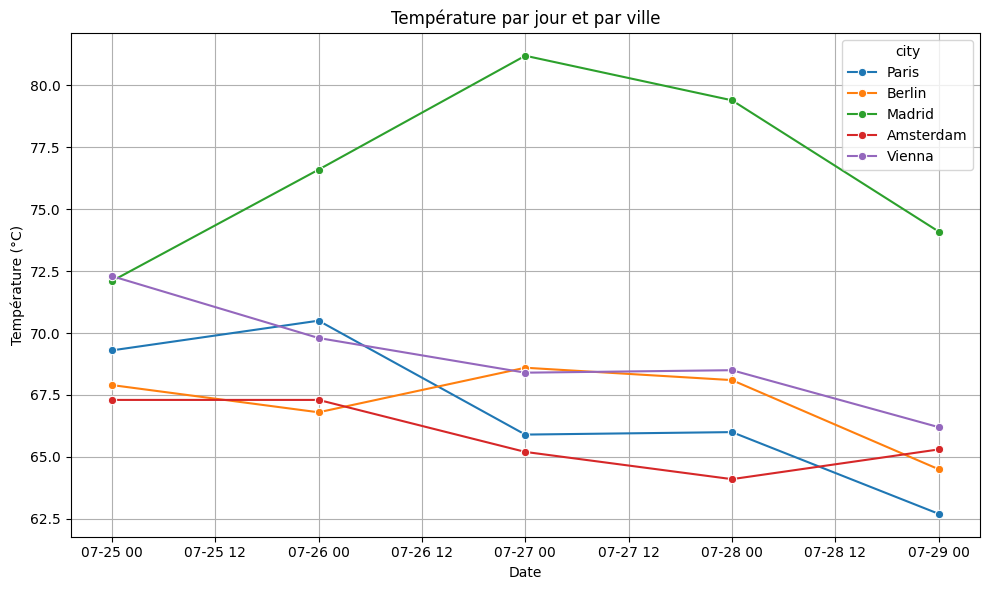

In [131]:
# S'assurer que datetime est bien de type datetime
df_all["datetime"] = pd.to_datetime(df_all["datetime"])

# Taille de la figure
plt.figure(figsize=(10, 6))

# Courbes de température par ville
sns.lineplot(data=df_all, x="datetime", y="temp", hue="city", marker="o")

plt.title("Température par jour et par ville")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [132]:
cities = ["Paris", "Berlin", "Madrid", "Amsterdam", "Vienna"]

### 🗺️ Obtenir les coordonnées
import requests

def get_city_coordinates(city, api_key):
    """
    Utilise l'API Geocoding d'OpenWeatherMap
    URL : http://api.openweathermap.org/geo/1.0/direct

    Récupère lat/lon pour une ville donnée.
    """

    url = "http://api.openweathermap.org/geo/1.0/direct"
    
    params = {
        "q": city,
        "limit": 1,  # On limite à 1 pour obtenir la correspondance la plus pertinente
        "appid": api_key
    }

    try:
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()  # Lève une exception pour les erreurs HTTP

        data = response.json()

        if not data:
            print(f"Aucune coordonnée trouvée pour la ville : {city}")
            return None
        
        return data

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête pour la ville {city} : {e}")
        return None

coordinates_data = []
for city in cities:
    results = get_city_coordinates(cities, OW_API_KEY) #Retourne les villes avec le même nom présentes de partout dans le monde.
    if results:
        lat= results[0]["lat"] # Dans 99% des cas, le premier résultat est le plus pertinent pour une ville connue comme "Paris", "Berlin", etc.
        lon= results[0]["lon"] # L’API trie les résultats par pertinence (selon la popularité, la taille, etc.)
        coordinates_data.append({
            "ville": city, #on enlève la ville pour le besoin de la fonction suivante
            "lat": lat,
            "lon": lon
        })
     
    else:
        print(f"Aucune coordonnée trouvée pour {city}")
print(coordinates_data)


[{'ville': 'Paris', 'lat': 48.8588897, 'lon': 2.3200410217200766}, {'ville': 'Berlin', 'lat': 48.8588897, 'lon': 2.3200410217200766}, {'ville': 'Madrid', 'lat': 48.8588897, 'lon': 2.3200410217200766}, {'ville': 'Amsterdam', 'lat': 48.8588897, 'lon': 2.3200410217200766}, {'ville': 'Vienna', 'lat': 48.8588897, 'lon': 2.3200410217200766}]


In [133]:
import time
## Partie 3 : API supplémentaire - Qualité de l'air
load_dotenv()
OW_API_KEY = os.getenv("OW_API_KEY")


import requests

def get_air_quality(lat, lon, start_date, end_date, api_key):
    """
    Récupère les données de qualité de l'air

    URL : http://api.openweathermap.org/data/2.5/air_pollution/history

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """
    BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution/history"

    params = {
        "lat": lat,
        "lon": lon,
        "start": start_date,
        "end": end_date,
        "appid": api_key
    }

    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()  # Lève une erreur si status != 200
        data = response.json()

        if "list" not in data:
            print(f"Aucune donnée de qualité de l'air disponible pour ({lat}, {lon}) entre {start_date} et {end_date}")
            return None

        return data

    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la récupération de la qualité de l'air pour ({lat}, {lon}): {e}")
        return None


# Fonctions utilitaires
def to_unix_timestamp(date_str):
    dt = datetime.strptime(date_str, "%Y-%m-%d")
    return int(time.mktime(dt.timetuple()))

start_date = "2025-07-26"
end_date = "2025-07-30"

# Conversion des dates en timestamps UNIX
start_unix = to_unix_timestamp(start_date)
end_unix = to_unix_timestamp(end_date)




In [134]:
from datetime import datetime, timezone

all_data = []  # Pour stocker les résultats

for entry in coordinates_data:
    city = entry["ville"]
    lat = entry["lat"]
    lon = entry["lon"]

    # Appel de la fonction pour récupérer la qualité de l'air
    air_quality_data = get_air_quality(lat, lon, start_unix, end_unix, OW_API_KEY)

    if "list" in air_quality_data:
        print(f"Données récupérées pour {city}, nombre d'entrées :", len(air_quality_data["list"]))

        for measurement in air_quality_data["list"]:
            dt_unix = measurement["dt"]
            dt = datetime.fromtimestamp(dt_unix, tz=timezone.utc)

            aqi = measurement["main"]["aqi"]
            components = measurement["components"]

            all_data.append({
                "ville": city,
                "datetime": dt,
                "aqi": aqi,
                "pm2_5": components.get("pm2_5"),
                "pm10": components.get("pm10"),
                "o3": components.get("o3"),
                "co": components.get("co"),
                "no": components.get("no"),
                "no2": components.get("no2"),
                "so2": components.get("so2"),
                "nh3": components.get("nh3")
            })
    else:
        print(f"Aucune donnée de qualité de l'air pour {city}")
print(all_data)


Données récupérées pour Paris, nombre d'entrées : 97
Données récupérées pour Berlin, nombre d'entrées : 97
Données récupérées pour Madrid, nombre d'entrées : 97
Données récupérées pour Amsterdam, nombre d'entrées : 97
Données récupérées pour Vienna, nombre d'entrées : 97
[{'ville': 'Paris', 'datetime': datetime.datetime(2025, 7, 25, 22, 0, tzinfo=datetime.timezone.utc), 'aqi': 1, 'pm2_5': 4.37, 'pm10': 5.17, 'o3': 50.84, 'co': 112.99, 'no': 0, 'no2': 4.14, 'so2': 0.19, 'nh3': 3.33}, {'ville': 'Paris', 'datetime': datetime.datetime(2025, 7, 25, 23, 0, tzinfo=datetime.timezone.utc), 'aqi': 1, 'pm2_5': 4.41, 'pm10': 5.29, 'o3': 45.53, 'co': 112.62, 'no': 0, 'no2': 3.81, 'so2': 0.17, 'nh3': 2.34}, {'ville': 'Paris', 'datetime': datetime.datetime(2025, 7, 26, 0, 0, tzinfo=datetime.timezone.utc), 'aqi': 1, 'pm2_5': 4.45, 'pm10': 5.47, 'o3': 42.5, 'co': 112.69, 'no': 0, 'no2': 3.32, 'so2': 0.17, 'nh3': 1.62}, {'ville': 'Paris', 'datetime': datetime.datetime(2025, 7, 26, 1, 0, tzinfo=datetime.

# Préparation des colonnes pour la fusion

In [135]:
import pandas as pd

# Création du DataFrame df_air à partir des données de qualité de l'air
df_air = pd.DataFrame(all_data)

# Conversion des colonnes datetime en objets datetime (format reconnu par pandas)
df_air['datetime'] = pd.to_datetime(df_air['datetime'], errors='coerce')
df_all['datetime'] = pd.to_datetime(df_all['datetime'], errors='coerce')

# Extraction de la date sans l'heure
df_air['date'] = df_air['datetime'].dt.date
df_all['date'] = df_all['datetime'].dt.date

# Agrégation journalière des données de qualité de l'air (moyenne par ville et jour)
df_air_daily = df_air.groupby(['ville', 'date'], as_index=False).agg({
    'aqi': 'mean',
    'pm2_5': 'mean',
    'pm10': 'mean',
    'o3': 'mean',
    'co': 'mean',
    'no': 'mean',
    'no2': 'mean',
    'so2': 'mean',
    'nh3': 'mean'
})

# Harmonisation du nom de la colonne pour permettre la fusion
df_air_daily.rename(columns={'ville': 'city'}, inplace=True)

# Fusion des données météo avec les données de qualité de l'air
df_merged = pd.merge(df_all, df_air_daily, on=['city', 'date'], how='left')

# (Optionnel) Supprimer la colonne 'date' si elle n'est plus utile
# df_merged.drop(columns=['date'], inplace=True)


print(df_merged)

     datetime       city  temp  humidity  precip  windspeed        date  \
0  2025-07-25      Paris  69.3      72.8   0.000        7.6  2025-07-25   
1  2025-07-26      Paris  70.5      67.8   0.000       10.1  2025-07-26   
2  2025-07-27      Paris  65.9      78.8   0.221       14.4  2025-07-27   
3  2025-07-28      Paris  66.0      65.9   0.000        8.6  2025-07-28   
4  2025-07-29      Paris  62.7      78.8   0.052       10.3  2025-07-29   
5  2025-07-25     Berlin  67.9      85.0   0.166       12.1  2025-07-25   
6  2025-07-26     Berlin  66.8      78.5   0.099        9.7  2025-07-26   
7  2025-07-27     Berlin  68.6      69.7   0.000       11.4  2025-07-27   
8  2025-07-28     Berlin  68.1      72.2   0.112       18.3  2025-07-28   
9  2025-07-29     Berlin  64.5      69.2   0.000       15.0  2025-07-29   
10 2025-07-25     Madrid  72.1      38.2   0.000       10.7  2025-07-25   
11 2025-07-26     Madrid  76.6      35.9   0.000        9.2  2025-07-26   
12 2025-07-27     Madrid 

In [136]:
#Vérifiactions des correspondances de colonnes:
print(df_all.columns)
print(df_air.columns)


Index(['datetime', 'city', 'temp', 'humidity', 'precip', 'windspeed', 'date'], dtype='object')
Index(['ville', 'datetime', 'aqi', 'pm2_5', 'pm10', 'o3', 'co', 'no', 'no2',
       'so2', 'nh3', 'date'],
      dtype='object')


In [137]:
#Vérification des correspondances es dates: 
print("Dates dans df_all:", df_all['date'].unique())
print("Dates dans df_air:", df_air['date'].unique())


Dates dans df_all: [datetime.date(2025, 7, 25) datetime.date(2025, 7, 26)
 datetime.date(2025, 7, 27) datetime.date(2025, 7, 28)
 datetime.date(2025, 7, 29)]
Dates dans df_air: [datetime.date(2025, 7, 25) datetime.date(2025, 7, 26)
 datetime.date(2025, 7, 27) datetime.date(2025, 7, 28)
 datetime.date(2025, 7, 29)]


In [138]:
#Exercice
dict = {"a":1,"b":2, "c":3}
dict_inverse = {}
for key,value in dict.items():
    dict_inverse[value]=key
print(dict_inverse)


{1: 'a', 2: 'b', 3: 'c'}



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

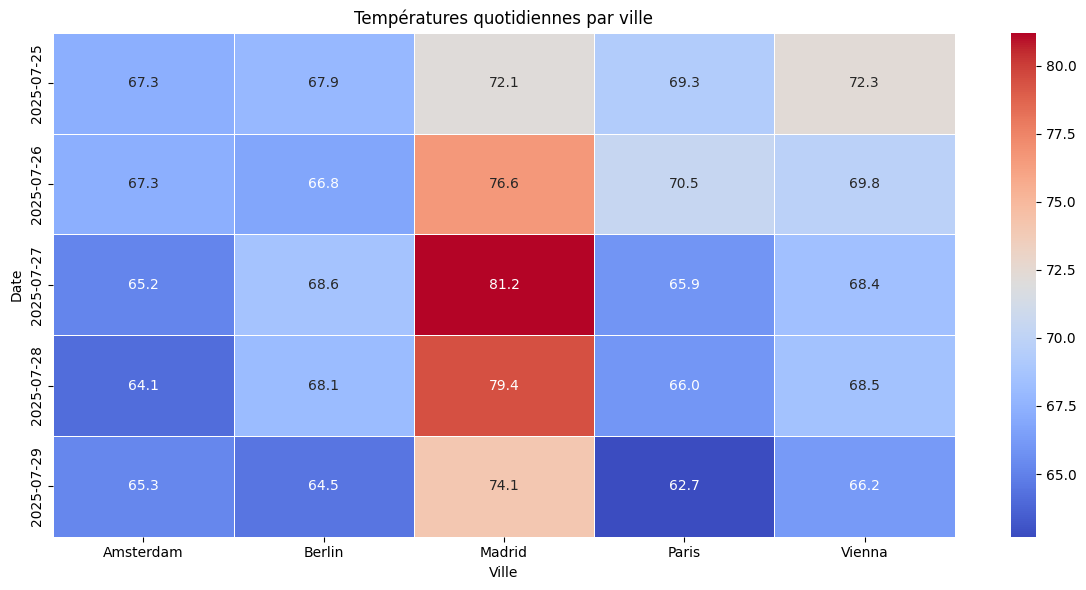

/tmp/ipykernel_983/988826835.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='city', y='precip', palette='Blues')


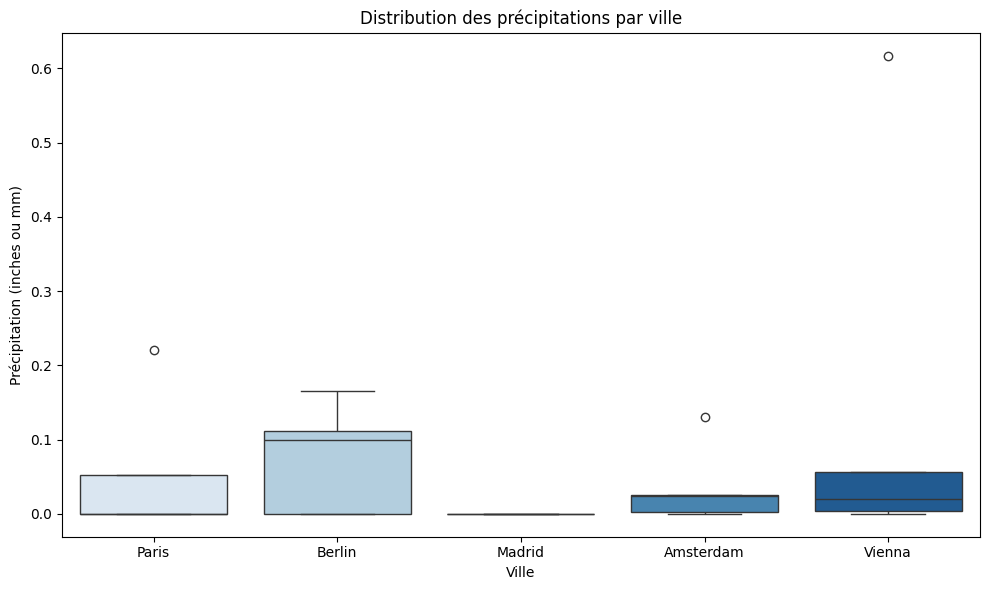

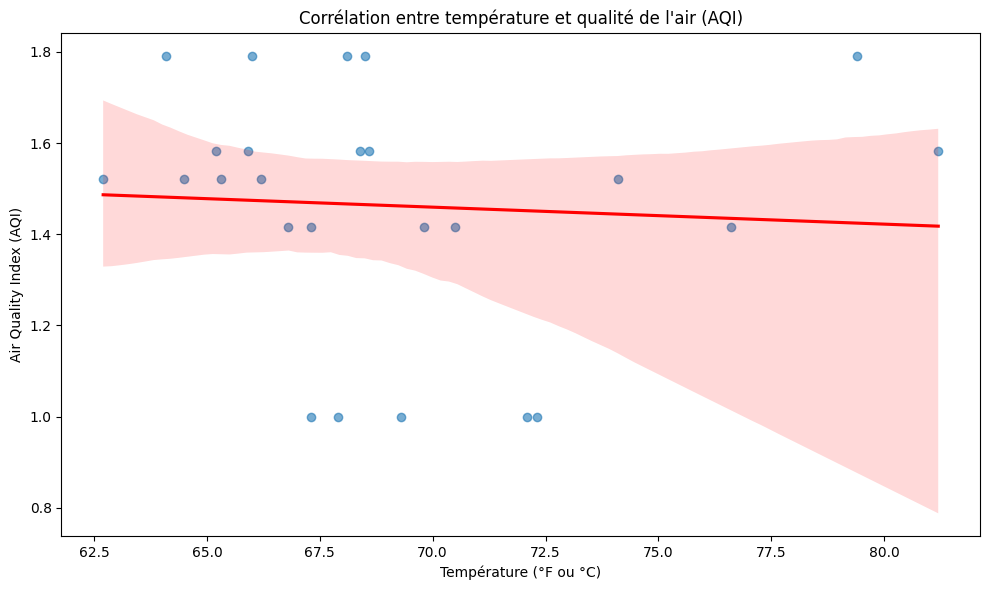

In [139]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()
pivot_temp = df_merged.pivot_table(index='date', columns='city', values='temp')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_temp, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Températures quotidiennes par ville")
plt.xlabel("Ville")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='city', y='precip', palette='Blues')
plt.title("Distribution des précipitations par ville")
plt.xlabel("Ville")
plt.ylabel("Précipitation (inches ou mm)")
plt.tight_layout()
plt.show()
# 3. Scatter plot qualité air vs température
# Ajoutez une regression line avec seaborn.regplot()
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='temp', y='aqi', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Corrélation entre température et qualité de l'air (AQI)")
plt.xlabel("Température (°F ou °C)")
plt.ylabel("Air Quality Index (AQI)")
plt.tight_layout()
plt.show()



## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [140]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [141]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites